In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import nltk
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)

# 1. Initial EDA

# Read in data

In [6]:
df = pd.read_csv('../../data/combined_cleaned_500k.csv',  lineterminator='\n', encoding='utf8')
df


text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i think most singaporeans dont give a damn who taiwan belong to   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            fair point the secrecy aspect of it slipped my mind   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          range   
3                                                     gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset   
4                                                                                                                                                                                                                                                                                                                                                                                                       

a closer look at some links from each of the subreddits

In [7]:
sg = df[df['link'].str.startswith('/r/singapore')].reset_index(drop=True)
print(sg['link'][0])
sgraw = df[df['link'].str.startswith('/r/SingaporeRaw')].reset_index(drop=True)
print(sgraw['link'][0])
sghap = df[df['link'].str.startswith('/r/singaporehappenings')].reset_index(drop=True)
print(sghap['link'][0])

/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/
/r/SingaporeRaw/comments/ofac8p/indian_government_there_are_650000_indians_in/h4d6tcs/
/r/singaporehappenings/comments/15p8ltg/singapore/jw3ory7/


# Rank by number of comments in each post

In [8]:
# get the title of the post that the comment is in (to sense what the post is talking about)
def get_title(link):
    parts = link.split('/')
    return parts[5]

# get the post that the comment is in (some posts have the same title)
def get_post(link):
    parts = link.split('/')
    subreddit = parts[2]
    post_id = parts[4]
    title = parts[5]
    return subreddit + ',' + post_id + ',' + title

df['title'] = df['link'].apply(get_title)
df['post'] = df['link'].apply(get_post)
df

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i think most singaporeans dont give a damn who taiwan belong to   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            fair point the secrecy aspect of it slipped my mind   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          range   
3                                                     gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset   
4                                                                                                                                                                                                                                                                                                                                                                                                       

Rank posts by number of comments, from most to least

In [9]:
counts = df['post'].value_counts()

# getting the top 10 posts with the most number of comments
print(counts[0:10])

post
singapore,homxdq,singapore_general_elections_2020_polling_results    918
singapore,kzg304,rsingapore_random_discussion_and_small_questions    375
singapore,hpikf7,level_system_trial_2                                367
singapore,ky4zne,rsingapore_random_discussion_and_small_questions    237
singapore,kwr24m,rsingapore_random_discussion_and_small_questions    235
singapore,kw1u3f,rsingapore_random_discussion_and_small_questions    232
singapore,knbva2,rsingapore_random_discussion_and_small_questions    226
singapore,l28wfr,rsingapore_random_discussion_and_small_questions    219
singapore,janlof,rsingapore_random_discussion_and_small_questions    214
singapore,kxfv50,rsingapore_random_discussion_and_small_questions    214
Name: count, dtype: int64


The polling results of Singapore's 2020 general elections were the most talked about topic, with the highest number of comments in the post `'singapore_general_elections_2020_polling_results'` among the 3 subreddits.

# Further exploration of posts

# Further exploration of posts

In [10]:
# top 20 posts with most number of comments
print(counts[0:20])

post
singapore,homxdq,singapore_general_elections_2020_polling_results    918
singapore,kzg304,rsingapore_random_discussion_and_small_questions    375
singapore,hpikf7,level_system_trial_2                                367
singapore,ky4zne,rsingapore_random_discussion_and_small_questions    237
singapore,kwr24m,rsingapore_random_discussion_and_small_questions    235
singapore,kw1u3f,rsingapore_random_discussion_and_small_questions    232
singapore,knbva2,rsingapore_random_discussion_and_small_questions    226
singapore,l28wfr,rsingapore_random_discussion_and_small_questions    219
singapore,janlof,rsingapore_random_discussion_and_small_questions    214
singapore,kxfv50,rsingapore_random_discussion_and_small_questions    214
singapore,kuo4mb,rsingapore_random_discussion_and_small_questions    204
singapore,l04x7f,rsingapore_random_discussion_and_small_questions    198
singapore,kcjtc2,rsingapore_random_discussion_and_small_questions    195
singapore,isvaje,rsingapore_random_discussion_

## Post: singapore general elections 2020 polling results

Let's find out what people are saying in this post.

In [11]:
ge2020_poll_results = df[df['post'] == 'singapore,homxdq,singapore_general_elections_2020_polling_results']
print(ge2020_poll_results['text'])

83                                                                                                       they could technically retire an mp in a smc to trigger a by election
163                             my sense as foreigner is that this time around people are mostly pissed at the rigged system not do much the foreigners like two elections ago
359                                                                  tpl really is hard af carrier kate spate now so strong even lhl go thr also cannot win future 5g minister
396                                                                                                                                  ah ya hor hes a new lad i stand corrected
525                                                                                                                                                should ican i help u repost
                                                                                          ...                                

## Post: rsingapore random discussion and small questions

It seems that a big bulk of the posts with most comments have the same title `'rsingapore_random_discussion_and_small_questions'`. In the subreddit r/singapore, there is a post dedicated to random discussions and small questions created daily. We analyse each post (for a particular day) individually by identifying them by their `link_id`.

In [12]:
# this is the post with the second most comments
print(counts[1:2])

post
singapore,kzg304,rsingapore_random_discussion_and_small_questions    375
Name: count, dtype: int64


In [13]:
rsingapore_random_discussion_and_small_questions_kzg304 = df[df['post'] == 'singapore,kzg304,rsingapore_random_discussion_and_small_questions']
print(rsingapore_random_discussion_and_small_questions_kzg304['text'])

673                                                                                                                                                                                                                                           NaN
1524                                                                                                                                                                                                                    ziana zain madah berhelah
1775                                                                                                                                                                                                                 noooooooo not the spin again
2144                                                                                                                                                                                   i just realize i turn xx years old this year holy shietttt
2371                            

Comments in the same post are largely uncorrelated. We would need to dive deeper into each comment thread to gauge the topic that is most talked.

## Post: level system trial

Let's look at the comments in this post.

In [14]:
level_system_trial_2 = df[df['post'] == 'singapore,hpikf7,level_system_trial_2']
print(level_system_trial_2['text'])

332                                               addflair text thumbs up man
1695                                                                 addflair
1975                                                addflair text what is zis
5697      addflair  text its me mariah carey and honey this is christmas baby
6319                                                                 addflair
                                         ...                                 
234537                                                   thanks for the flair
235370                                                               addflair
235893                                                               addflair
235909            addflair textcolor red text im called shi ting not shitting
236548                                                               addflair
Name: text, Length: 367, dtype: object


The post `'level_system_trial_2'` is where users add/remove level flair to their account. Comments are not communicative or meaningful, hence this post can be counted as insignificant.

## Other posts

Let us first remove the posts with titles `'rsingapore_random_discussion_and_small_questions'` and `'level_system_trial_2'`.

In [15]:
other_posts = df[(df['title'] != 'rsingapore_random_discussion_and_small_questions') & (df['title'] != 'level_system_trial_2')]
counts2 = other_posts['post'].value_counts()
print(counts2[0:20])

post
singapore,homxdq,singapore_general_elections_2020_polling_results     918
singapore,nc0vwe,no_dining_in_social_gatherings_capped_at_2_people    161
singapore,onx8xr,no_dining_in_social_group_sizes_cut_to_2_from        122
singapore,hie65n,ge2020_nomination_day_mega_thread                    121
singapore,hj8h5p,ge_2020_political_debate_megathread                  115
singapore,wjxxdd,megathread_national_day_parade_2022                  111
singapore,hs2ynr,this_is_basically_the_entirety_of_an_average         108
singapore,nosjic,megathread_pm_lee_delivers_national_address_on       106
singapore,on8f8m,river_valley_high_school_student_killed_on_campus    103
singapore,nj3o0j,someone_is_attacked_on_mrt                           102
singapore,q4cv50,pm_lee_to_address_nation_on_covid19_situation_and    100
singapore,wtc8jy,megathread_national_day_rally_2022                    99
singapore,qbyerz,stabilisation_phase_extended_to_nov_21_more_time      98
singapore,puh01k,covid19_diningin

Find out the topic of posts with ambiguous titles, by looking at comments

In [16]:
this_is_basically_the_entirety_of_an_average = df[df['post'] == 'singapore,hs2ynr,this_is_basically_the_entirety_of_an_average']
print(this_is_basically_the_entirety_of_an_average['text'])

845                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

It seems that people are talking about things concerning life and finances in Singapore.

In [17]:
stabilisation_phase_extended_to_nov_21_more_time = df[df['post'] == 'singapore,qbyerz,stabilisation_phase_extended_to_nov_21_more_time']
print(stabilisation_phase_extended_to_nov_21_more_time['text'])

6622                                     the restriction rates seem to be increasing along with vaccination rates smlj by mmtf logic once we hit 95 vaccination we are ready for martial law  nighttime curfew
6989      maybe someone can explain this to me since im too dumb to understand how can lawrence wong say that its too risky to let household members gt2 dine out together yet vtl tourists are being approved
9015                                                                                                                                                                             punish locals reward tourists
9439                                                                                                                                                         this is the mce tunnel one of the longest in asia
15428                                                                                                                                                        yep  and for a 

It seems that this post pertains to restrictions due to COVID-19.

In [18]:
pm_lee_announces_new_stricter_restrictions_to = df[df['post'] == 'singapore,fu4ch0,pm_lee_announces_new_stricter_restrictions_to']
print(pm_lee_announces_new_stricter_restrictions_to['text'])

7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

It seems that this post pertains to COVID-19 restrictions as well.

## Results

From the posts, the two large topics that come out are:
- **Singapore general elections 2020**
    - posts (based on top 20):
        - `'singapore_general_elections_2020_polling_results'`
        - `'ge2020_nomination_day_mega_thread'`
        - `'ge_2020_political_debate_megathread'`
    - total number of comments (based on top 20 posts): 1154
- **COVID-19, especially on dining restrictions**
    - posts (based on top 20):
        - `'no_dining_in_social_gatherings_capped_at_2_people...'`
        - `'no_dining_in_social_group_sizes_cut_to_2_from...'`
        - `'pm_lee_to_address_nation_on_covid19_situation_and...'`
        - `'stabilisation_phase_extended_to_nov_21_more_time...'`
        - `'covid19_diningin_group_size_limit_at_regular_fb...'`
        - `'pm_lee_announces_new_stricter_restrictions_to...'`
        - `'those_unvaccinated_against_covid19_will_no_longer...'`
        - `'live_pm_lee_addresses_nation_on_covid19_situation...'`
        - `'covid19_task_force_evaluating_timing_and_scope_of...'`
    - total number of comments (based on top 20 posts): 934

# 2. EDA2 with scores + topics

# Read in data

In [19]:
df_2 = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')
df_2

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i think most singaporeans dont give a damn who taiwan belong to   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            fair point the secrecy aspect of it slipped my mind   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          range   
3                                                     gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset   
4                                                                                                                                                                                                                                                                                                                                                                                                       

In [20]:
sg = df_2[df_2['link'].str.startswith('/r/singapore')].reset_index(drop=True)
print(sg['link'][0])
sgraw = df_2[df_2['link'].str.startswith('/r/SingaporeRaw')].reset_index(drop=True)
print(sgraw['link'][0])
sghap = df_2[df_2['link'].str.startswith('/r/singaporehappenings')].reset_index(drop=True)
print(sghap['link'][0])

/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/
/r/SingaporeRaw/comments/ofac8p/indian_government_there_are_650000_indians_in/h4d6tcs/
/r/singaporehappenings/comments/15p8ltg/singapore/jw3ory7/


# Rank by number of comments in each post

In [21]:
# get the title of the post that the comment is in (to sense what the post is talking about)
def get_title(link):
    parts = link.split('/')
    return parts[5]

# get the post that the comment is in (some posts have the same title)
def get_post(link):
    parts = link.split('/')
    subreddit = parts[2]
    post_id = parts[4]
    title = parts[5]
    return subreddit + ',' + post_id + ',' + title

df_2['title'] = df_2['link'].apply(get_title)
df_2['post'] = df_2['link'].apply(get_post)
df_2

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i think most singaporeans dont give a damn who taiwan belong to   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            fair point the secrecy aspect of it slipped my mind   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          range   
3                                                     gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset   
4                                                                                                                                                                                                                                                                                                                                                                                                       

In [22]:
counts = df_2['post'].value_counts()

# getting the top 10 posts with the most number of comments
print(counts[0:10])

post
singapore,homxdq,singapore_general_elections_2020_polling_results    918
singapore,kzg304,rsingapore_random_discussion_and_small_questions    375
singapore,hpikf7,level_system_trial_2                                367
singapore,ky4zne,rsingapore_random_discussion_and_small_questions    237
singapore,kwr24m,rsingapore_random_discussion_and_small_questions    235
singapore,kw1u3f,rsingapore_random_discussion_and_small_questions    232
singapore,knbva2,rsingapore_random_discussion_and_small_questions    226
singapore,l28wfr,rsingapore_random_discussion_and_small_questions    219
singapore,janlof,rsingapore_random_discussion_and_small_questions    214
singapore,kxfv50,rsingapore_random_discussion_and_small_questions    214
Name: count, dtype: int64


# Further exploration of posts

In [23]:
print(counts[0:20])

post
singapore,homxdq,singapore_general_elections_2020_polling_results    918
singapore,kzg304,rsingapore_random_discussion_and_small_questions    375
singapore,hpikf7,level_system_trial_2                                367
singapore,ky4zne,rsingapore_random_discussion_and_small_questions    237
singapore,kwr24m,rsingapore_random_discussion_and_small_questions    235
singapore,kw1u3f,rsingapore_random_discussion_and_small_questions    232
singapore,knbva2,rsingapore_random_discussion_and_small_questions    226
singapore,l28wfr,rsingapore_random_discussion_and_small_questions    219
singapore,janlof,rsingapore_random_discussion_and_small_questions    214
singapore,kxfv50,rsingapore_random_discussion_and_small_questions    214
singapore,kuo4mb,rsingapore_random_discussion_and_small_questions    204
singapore,l04x7f,rsingapore_random_discussion_and_small_questions    198
singapore,kcjtc2,rsingapore_random_discussion_and_small_questions    195
singapore,isvaje,rsingapore_random_discussion_

In [24]:
# Strip whitespace and remove carriage returns from column names
df_2.columns = df_2.columns.str.replace(r'\r', '', regex=True).str.strip()

# Display the cleaned column names to confirm
#df_2

# Other Posts 

In [25]:
other_posts = df_2[(df_2['title'] != 'rsingapore_random_discussion_and_small_questions') & (df['title'] != 'level_system_trial_2')]
counts2 = other_posts['post'].value_counts()
print(counts2[0:20])


post
singapore,homxdq,singapore_general_elections_2020_polling_results     918
singapore,nc0vwe,no_dining_in_social_gatherings_capped_at_2_people    161
singapore,onx8xr,no_dining_in_social_group_sizes_cut_to_2_from        122
singapore,hie65n,ge2020_nomination_day_mega_thread                    121
singapore,hj8h5p,ge_2020_political_debate_megathread                  115
singapore,wjxxdd,megathread_national_day_parade_2022                  111
singapore,hs2ynr,this_is_basically_the_entirety_of_an_average         108
singapore,nosjic,megathread_pm_lee_delivers_national_address_on       106
singapore,on8f8m,river_valley_high_school_student_killed_on_campus    103
singapore,nj3o0j,someone_is_attacked_on_mrt                           102
singapore,q4cv50,pm_lee_to_address_nation_on_covid19_situation_and    100
singapore,wtc8jy,megathread_national_day_rally_2022                    99
singapore,qbyerz,stabilisation_phase_extended_to_nov_21_more_time      98
singapore,puh01k,covid19_diningin

# Analysing top 20 posts(excluding random discussions & level system trial 2) grouped by their content 

There are 3 ambigous titles 'singapore,hs2ynr,this_is_basically_the_entirety_of_an_average' & 'singapore,nosjic,megathread_pm_lee_delivers_national_address_on' & 'singapore,q3204h,whats_the_point_of_bringing_a_life_into_singapore' 

In [26]:
test1_posts = df_2[df_2['post'].isin([
    'singapore,hs2ynr,this_is_basically_the_entirety_of_an_average'
])]
test1_posts 

text  \
845                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         hdb redid the rules for buying older flats recently though\n\nbut the rules are kinda complicatedi couldnt really follow at a casual glance   
1767                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [27]:
test2_posts = df_2[df_2['post'].isin([
    'singapore,nosjic,megathread_pm_lee_delivers_national_address_on'
])]
test2_posts 

text  \
2486                                                                                                             pm gave them his magic   
3825                                                               if people can do ancestry test like 23andme i dont see why this cant   
5592                                                                                     why is this qampa session so entertaining lmao   
5993                                                                                                         its made by china thats it   
7922    welcome to young adulthood aka sandwich generation\n\n\nbut to be fair there are legit reasons why others have been prioritised   
...                                                                                                                                 ...   
219739                                                                                         traceforevercast the net wider huehuehue   
221958                                                                     gti think they should just stop the mandarin segments\n\nwhy   
228272                                                                      hundred and eightytwwwooo cases\n\nwow oyk is jittery today   
235277       yea the reporter said they work with seniors at home who are vulnerable so why are students given priority instead of them   
236232      on the bright side i save a lot of money on makeup sometimes i can also yawn without being obvious very useful for meetings   

              timestamp     username  \
2486     31/5/2021 8:29   fatalystic   
3825     31/5/2021 8:10       -_af_-   
5592     31/5/2021 9:19  kafekitsune   
5993     31/5/2021 8:50   fatalystic   
7922     31/5/2021 8:59  dyestortion   
...                 ...          ...   
219739   31/5/2021 8:11     bourbunz   
221958   31/5/2021 9:30       neokai   
228272   31/5/2021 8:30      Dunkjoe   
235277  31/5/2021 16:05   lemonberri   
236232   31/5/2021 8:29     -jugjug-   

                                                                                        link  \
2486    /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02acw0/   
3825    /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h0296e2/   
5592    /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02df7t/   
5993    /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02bo5j/   
7922    /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02c70q/   
...                                                                                      ...   
219739  /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h0297wf/   
221958  /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02e2cd/   
228272  /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02af73/   
235277  /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h03e8ol/   
236232  /r/singapore/comments/nosjic/megathread_pm_lee_delivers_national_address_on/h02adu5/   

          link_id   parent_id       id subreddit_id  \
2486    t3_nosjic  t1_h02abyz  h02acw0     t5_2qh8c   
3825    t3_nosjic  t1_h0292j6  h0296e2     t5_2qh8c   
5592    t3_nosjic   t3_nosjic  h02df7t     t5_2qh8c   
5993    t3_nosjic  t1_h02bnfx  h02bo5j     t5_2qh8c   
7922    t3_nosjic  t1_h02c55a  h02c70q     t5_2qh8c   
...           ...         ...      ...          ...   
219739  t3_nosjic   t3_nosjic  h0297wf     t5_2qh8c   
221958  t3_nosjic  t1_h02c30r  h02e2cd     t5_2qh8c   
228272  t3_nosjic   t3_nosjic  h02af73     t5_2qh8c   
235277  t3_nosjic  t1_h03e0k9  h03e8ol     t5_2qh8c   
236232  t3_nosjic  t1_h02a521  h02adu5     t5_2qh8c   

                                                                                                                                moderation  \
2486    {'collapsed_reaso

In [28]:
test3_posts = df_2[df_2['post'].isin([
    'singapore,q3204h,whats_the_point_of_bringing_a_life_into_singapore'
])]
test3_posts 

text  \
1646                                                                                                                                                                                                                                                                                                                                                    thats even better than our retarded 2 years   
3008                                                                                                                                                                                                                                                                              another responsible parent am i in the twilight zone or have i just been surrounded by toxic people my whole life   
8083                                                                                                                                                                                                                                                                                                                                                                                         agreed   
8561                                                                                                                                                                                                                                                      they want a playdoll to mould a personality in shows that kids are tools to them god forbid they have personalities and will of their own   
15119                                                                                                                                                                                                                                                                                                                                 come to malaysia lots of land for you to roam and set up shop   
...                                                                                                                                                                                                                                                                                                                                                                                             ...   
226387                                                                                                                                                                                                                                                                                                                                                                                   fair point   
231516                                                                                                                                                                                                                i was in ptp batch so just 2 weeks shorter from obese batch  yes for bmt they used the following name for batches\n\nenhanced 2 months\nptp 4 months\nobese 4 months  2 weeks   
235599                                                                                                                                                                                                                                                                                                    dont forget ns reservist being discriminated for going reservist or wasting 2 years in ns   
235737                                                                                                                                                                                                                                                                                                           if there is no objective morality why are you judging people as egocentric douches   
236053  sure but thats the nature of things somethings have become relatively chea

# Using 'link' column to identify content of post

1. 'singapore,hs2ynr,this_is_basically_the_entirety_of_an_average' = [This is basically the entirety of an average Singaporean's life summed up. Express your opinions in the comments.](https://www.reddit.com/r/singapore/comments/hs2ynr/comment/fy865pe/). Note the post includes an image of a the 'life cycle' of a singaporean, in a mostly negative light. Eg. it portrays the never ending work and financial.  

 2. 'singapore,nosjic,megathread_pm_lee_delivers_national_address_on' = [PM Lee delivers national address on Singapore's approach to Covid-19](https://www.reddit.com/r/singapore/comments/nosjic/comment/h02acw0/).

3. 'singapore,q3204h,whats_the_point_of_bringing_a_life_into_singapore' = [What’s the point of bringing a life into Singapore?](https://www.reddit.com/r/singapore/comments/q3204h/comment/hfpdzif/). Note the post discusses the point of having children who will go through stresses in terms of climate change, education stress, rising cost of living, and national service. 

# Analysis of tops posts based on their content categories

## a. Posts: singapore general elections 2020 posts

Lets explore the top posts (within remaining top 20) that involve the general elections

In [29]:
ge2020_posts = df_2[df_2['post'].isin([
    'singapore,homxdq,singapore_general_elections_2020_polling_results',
    'singapore,hie65n,ge2020_nomination_day_mega_thread',
    'singapore,hj8h5p,ge_2020_political_debate_megathread',
])]
ge2020_posts 

text  \
83                                                                                         they could technically retire an mp in a smc to trigger a by election   
163               my sense as foreigner is that this time around people are mostly pissed at the rigged system not do much the foreigners like two elections ago   
359                                                    tpl really is hard af carrier kate spate now so strong even lhl go thr also cannot win future 5g minister   
396                                                                                                                    ah ya hor hes a new lad i stand corrected   
525                                                                                                                                  should ican i help u repost   
...                                                                                                                                                          ...   
235324                                                                                            on the way there with bedok hub shouhld have more stuff coming   
235354                                                         i just dont want a parliament where a supermajority of the members are beholden to one party whip   
235762                                                                                                                                           west coast huat   
236448                                                                                                                                                  dont leh   
236466  no point talking about absolute number of rejected votes when every constituency has different total voter numbers change to percentage and then compare   

              timestamp              username  \
83      10/7/2020 16:58             deangsana   
163     10/7/2020 15:43         generaladdict   
359     10/7/2020 16:13                xxxr18   
396      11/7/2020 5:18  EconomyIndependence2   
525      11/7/2020 5:04             Rockylol_   
...                 ...                   ...   
235324   30/6/2020 4:14        Jammy_buttons2   
235354   11/7/2020 3:11             Varantain   
235762  10/7/2020 16:46          MisoMesoMilo   
236448  10/7/2020 14:54             Chelseymn   
236466  10/7/2020 19:31       veryfascinating   

                                                                                          link  \
83      /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxjq2mi/   
163     /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxjgu97/   
359     /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxjkhb6/   
396     /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxlyf03/   
525     /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxlwx1b/   
...                                                                                        ...   
235324                 /r/singapore/comments/hie65n/ge2020_nomination_day_mega_thread/fwfy7c1/   
235354  /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxllod2/   
235762  /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxjohzw/   
236448  /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxjaytv/   
236466  /r/singapore/comments/homxdq/singapore_general_elections_2020_polling_results/fxk912e/   

          link_id   parent_id       id subreddit_id  \
83      t3_homxdq  t1_fxjpw7i  fxjq2mi     t5_2qh8c   
163     t3_homxdq  t1_fxjgobr  fxjgu97     t5_2qh8c   
359     t3_homxdq   t3_homxdq  fxjkhb6     t5_2qh8c   
396     t3_homxdq  t1_fxly46f  fxlyf03     t5_2qh8c   
525     t3_homxdq  t1_fxltwpu  fxlwx1b     t5_2qh8c   
...           ...         ...      ...          ...   
235324  t3_hie65n  t1_fwfwn66  fwfy7

In [30]:
# Calculate the mean for each of the specified columns
mean_hateful_score = ge2020_posts['hateful Score'].mean()
mean_hateful_hr = ge2020_posts['hateful HR'].mean()
mean_toxic_score = ge2020_posts['toxic Score'].mean()
mean_toxic_hr = ge2020_posts['toxic HR'].mean()

# Calculate the mode for each of the specified columns
mode_hateful_score = ge2020_posts['hateful Score'].mode()[0]  # Using [0] to get the first mode if there are multiple
mode_hateful_hr = ge2020_posts['hateful HR'].mode()[0]
mode_toxic_score = ge2020_posts['toxic Score'].mode()[0]
mode_toxic_hr = ge2020_posts['toxic HR'].mode()[0]

# Display the results
print("Mean Hateful Score:", mean_hateful_score)
print("Mode Hateful Score:", mode_hateful_score)
print("Mean Hateful HR:", mean_hateful_hr)
print("Mode Hateful HR:", mode_hateful_hr)
print("Mean Toxic Score:", mean_toxic_score)
print("Mode Toxic Score:", mode_toxic_score)
print("Mean Toxic HR:", mean_toxic_hr)
print("Mode Toxic HR:", mode_toxic_hr)


Mean Hateful Score: -0.9549853326871751
Mode Hateful Score: -0.89654845
Mean Hateful HR: 0.006065857885615251
Mode Hateful HR: 0
Mean Toxic Score: -0.4083026878110919
Mode Toxic Score: -1.2394106
Mean Toxic HR: 0.18717504332755633
Mode Toxic HR: 0


## b. Posts: Covid-19 

In [31]:
covid_posts = df_2[df_2['post'].isin([
    'singapore,nc0vwe,no_dining_in_social_gatherings_capped_at_2_people',  
    'singapore,onx8xr,no_dining_in_social_group_sizes_cut_to_2_from',
    'singapore,qbyerz,stabilisation_phase_extended_to_nov_21_more_time',  
    'singapore,puh01k,covid19_diningin_group_size_limit_at_regular_fb',
    'singapore,fu4ch0,pm_lee_announces_new_stricter_restrictions_to', 
    'singapore,q4e96u,those_unvaccinated_against_covid19_will_no_longer',   
    'singapore,tlvwx9,live_pm_lee_addresses_nation_on_covid19_situation',   
    'singapore,o104h0,covid19_task_force_evaluating_timing_and_scope_of',
    'singapore,nosjic,megathread_pm_lee_delivers_national_address_on'   
])]
covid_posts

text  \
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          sometimes there are restrictions on how often people can go out to buy essentials though or how many people per household that isnt the case here   
322                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                pay is bad hours are bad good luck hiring qualified staff   
503                                                                                                                                                                                                                                                                                     i am one of those people \n\nthe odds of that happening are perhaps around 001 per cent or lower so a 001 per cent chance of losing 50 more years of my life versus a 100 chance of losing almost 15 of the best years of my life i choose the former \n\nthose who dont like these odds are free to continue locking themselves up in their own homes and isolating   
583     i dont think its just a convenient scapegoat this incident simply reflected how vice has been repulsive to the general public and the vast majority will take any chance to get rid of that thorn in the flesh\n\nwe know fingerpointing is counterproductive but at this juncture anyone who is speaking up for vice and illegal activities seem to be siding and almost endorsing those activities\n\nthe least anyone can do right now is not victimise the ktv cluster it only adds fuel to the fire call a spade a spade they illegally open when told not to and they did they should be gunned no matter where the source came from full stop   
1796                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         you can still test positive via pcr test after being vaccinated hence why the govts focus on cases is pointless   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...   
394147                                                                                                                                                  

In [32]:
# Calculate the mean for each of the specified columns
mean_hateful_score = covid_posts['hateful Score'].mean()
mean_hateful_hr = covid_posts['hateful HR'].mean()
mean_toxic_score = covid_posts['toxic Score'].mean()
mean_toxic_hr = covid_posts['toxic HR'].mean()

# Calculate the mode for each of the specified columns
mode_hateful_score = covid_posts['hateful Score'].mode()[0]  # Using [0] to get the first mode if there are multiple
mode_hateful_hr = covid_posts['hateful HR'].mode()[0]
mode_toxic_score = covid_posts['toxic Score'].mode()[0]
mode_toxic_hr = covid_posts['toxic HR'].mode()[0]

# Display the results
print("Mean Hateful Score:", mean_hateful_score)
print("Mode Hateful Score:", mode_hateful_score)
print("Mean Hateful HR:", mean_hateful_hr)
print("Mode Hateful HR:", mode_hateful_hr)
print("Mean Toxic Score:", mean_toxic_score)
print("Mode Toxic Score:", mode_toxic_score)
print("Mean Toxic HR:", mean_toxic_hr)
print("Mode Toxic HR:", mode_toxic_hr)

Mean Hateful Score: -0.9736822824946809
Mode Hateful Score: -1.2388561
Mean Hateful HR: 0.00851063829787234
Mode Hateful HR: 0
Mean Toxic Score: -0.5002266036829788
Mode Toxic Score: -1.3305995
Mean Toxic HR: 0.1595744680851064
Mode Toxic HR: 0


## c. Posts: National day 

In [33]:
nationalday_posts = df_2[df_2['post'].isin([
    'singapore,wjxxdd,megathread_national_day_parade_2022',
    'singapore,wtc8jy,megathread_national_day_rally_2022',
           
])]
nationalday_posts

text  \
237507                                                                                                      all eyes on the commandos later if they will march wrongly this time hahaha   
238789                                                                                                                                                             man is on fire today   
238949                                                                                                                       seriously hope the guy is okay that really looked damn bad   
239631  from pink dot gaining so much mainstream support to this repeal small and gradual victories ill take it huge thanks to the activists sticking their necks out for our community   
241079                                                                                        that gordon ramsay meme \n\nmalay oh dear oh dear gorgeous \n\nchinese you fucking donkey   
...                                                                                                                                                                                 ...   
394454                                                                                                                                                         who directed this adrian   
394526                                                                                                                                               the future  glass glass everywhere   
394578                                                                                                                                          i didnt say commercial surrogacy though   
394759                                                                       must subvert the trope of the perfect ending scoring a goal  impart the moral of persevering after failure   
395686                                                                  actually wonder what upcoming church sermons gonna be likeif some people gonna be kpkbing in their congregation   

              timestamp             username  \
237507   9/8/2022 10:32             sageadam   
238789  21/8/2022 12:38  singledesperateugly   
238949   9/8/2022 10:15          Dementium84   
239631  21/8/2022 12:32               ceddya   
241079  21/8/2022 11:21       biasedrapier26   
...                 ...                  ...   
394454   9/8/2022 12:05   watermelonchild801   
394526  21/8/2022 13:01              zetbotz   
394578  21/8/2022 14:40             oOoRaoOo   
394759   9/8/2022 12:12              btcprox   
395686  21/8/2022 13:20   Familiar-Mouse4490   

                                                                             link  \
237507  /r/singapore/comments/wjxxdd/megathread_national_day_parade_2022/ijk9jet/   
238789   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il6p6sb/   
238949  /r/singapore/comments/wjxxdd/megathread_national_day_parade_2022/ijk859e/   
239631   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il6ontz/   
241079   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il6i5ae/   
...                                                                           ...   
394454  /r/singapore/comments/wjxxdd/megathread_national_day_parade_2022/ijkibga/   
394526   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il6rlgp/   
394578   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il73vjl/   
394759  /r/singapore/comments/wjxxdd/megathread_national_day_parade_2022/ijkj3dn/   
395686   /r/singapore/comments/wtc8jy/megathread_national_day_rally_2022/il6tp2j/   

          link_id   parent_id       id subreddit_id  \
237507  t3_wjxxdd   t3_wjxxdd  ijk9jet     t5_2qh8c   
238789  t3_wtc8jy   t3_wtc8jy  il6p6sb     t5_2qh8c   
238949  t3_wjxxdd  t1_ijk816z  ijk859e     t5_2qh8c   
239631  t3_wtc8jy   t3_wtc8jy  il6ontz     t5_2qh8c   
241079  t3_wtc8jy  t1_il6hs11  il6i5ae     t5_2qh8c   
...   

In [34]:
# Calculate the mean for each of the specified columns
mean_hateful_score = covid_posts['hateful Score'].mean()
mean_hateful_hr = covid_posts['hateful HR'].mean()
mean_toxic_score = covid_posts['toxic Score'].mean()
mean_toxic_hr = covid_posts['toxic HR'].mean()

# Calculate the mode for each of the specified columns
mode_hateful_score = covid_posts['hateful Score'].mode()[0]  # Using [0] to get the first mode if there are multiple
mode_hateful_hr = covid_posts['hateful HR'].mode()[0]
mode_toxic_score = covid_posts['toxic Score'].mode()[0]
mode_toxic_hr = covid_posts['toxic HR'].mode()[0]

# Display the results
print("Mean Hateful Score:", mean_hateful_score)
print("Mode Hateful Score:", mode_hateful_score)
print("Mean Hateful HR:", mean_hateful_hr)
print("Mode Hateful HR:", mode_hateful_hr)
print("Mean Toxic Score:", mean_toxic_score)
print("Mode Toxic Score:", mode_toxic_score)
print("Mean Toxic HR:", mean_toxic_hr)
print("Mode Toxic HR:", mode_toxic_hr)

Mean Hateful Score: -0.9736822824946809
Mode Hateful Score: -1.2388561
Mean Hateful HR: 0.00851063829787234
Mode Hateful HR: 0
Mean Toxic Score: -0.5002266036829788
Mode Toxic Score: -1.3305995
Mean Toxic HR: 0.1595744680851064
Mode Toxic HR: 0


## d. Posts: Stressful SG Life

In [35]:
lifestyle_stress_posts = df_2[df_2['post'].isin([
    'singapore,hs2ynr,this_is_basically_the_entirety_of_an_average',
    'singapore,q3204h,whats_the_point_of_bringing_a_life_into_singapore '
           
])]
lifestyle_stress_posts

text  \
845                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         hdb redid the rules for buying older flats recently though\n\nbut the rules are kinda complicatedi couldnt really follow at a casual glance   
1767                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## e. Posts: Violent Events

In [36]:
violent_posts = df_2[df_2['post'].isin([
    'singapore,on8f8m,river_valley_high_school_student_killed_on_campus',
    'singapore,nj3o0j,someone_is_attacked_on_mrt'   
])]
violent_posts

text  \
1185                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             no more like chinahttpsenmwikipediaorgwikischoolattacksinchina americans shoot chinese stab   
1928                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   aiyoh y no one at least shout at him to stop the auntie and the videographer really should be ashamed   
2256                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          i think its to do with living in pasir ris and going to school in boon lay lol   
2662                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    lols is this s google koh yong chiah   
3508                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               oh reported for brigading   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## f. Posts: Miscellaneous

In [37]:
misc_posts = df_2[df_2['post'].isin([
    'singapore,on2hbu,using_only_emojis_which_town_are_you_from'
])]
misc_posts

text       timestamp        username  \
651                       yes  19/7/2021 4:57    M20104RISEUP   
2329                      NaN  19/7/2021 2:20       maligncat   
5253      workers party right  19/7/2021 4:15  frenchypoisson   
6817                    based  19/7/2021 3:49   CarryingTrash   
10695   how do i put cck haha  19/7/2021 3:44         Pok3dab   
...                       ...             ...             ...   
218502                    yup  19/7/2021 1:14     whatsnewdan   
223593          harbour front  19/7/2021 2:32          qwte25   
224323                  bedok  19/7/2021 7:37   NovaSierra123   
224559                    NaN  19/7/2021 8:53     bathsalt999   
225416                    NaN  19/7/2021 1:49           hanlk   

                                                                                   link  \
651     /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5pwd1l/   
2329    /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5pge1u/   
5253    /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5psli6/   
6817    /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5pq28z/   
10695   /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5ppj3p/   
...                                                                                 ...   
218502  /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5p8it0/   
223593  /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5phui8/   
224323  /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5q8ipx/   
224559  /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5qdo4c/   
225416  /r/singapore/comments/on2hbu/using_only_emojis_which_town_are_you_from/h5pcrld/   

          link_id   parent_id       id subreddit_id  \
651     t3_on2hbu  t1_h5pvssq  h5pwd1l     t5_2qh8c   
2329    t3_on2hbu   t3_on2hbu  h5pge1u     t5_2qh8c   
5253    t3_on2hbu  t1_h5pnd47  h5psli6     t5_2qh8c   
6817    t3_on2hbu  t1_h5p840l  h5pq28z     t5_2qh8c   
10695   t3_on2hbu   t3_on2hbu  h5ppj3p     t5_2qh8c   
...           ...         ...      ...          ...   
218502  t3_on2hbu  t1_h5p8fd5  h5p8it0     t5_2qh8c   
223593  t3_on2hbu  t1_h5p7wip  h5phui8     t5_2qh8c   
224323  t3_on2hbu  t1_h5q1tgm  h5q8ipx     t5_2qh8c   
224559  t3_on2hbu   t3_on2hbu  h5qdo4c     t5_2qh8c   
225416  t3_on2hbu   t3_on2hbu  h5pcrld     t5_2qh8c   

                                                                                                    moderation  \
651     {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
2329    {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
5253    {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
6817    {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
10695   {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
...                                                                                                        ...   
218502  {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
223593  {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
224323  {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
224559  {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   
225416  {'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}\r   

        hateful Score  hateful HR  toxic Score  toxic HR  Topic Number  \
651         -0.825059           0    -0.823265 

# Making new dataframe with the means and modes of toxicity & hatefulness scores for each content category <br> (General Elections, Covid-19, National Day, Stressful SG Lifestyle, Violent Event, Miscellaneous)

In [38]:

# List of DataFrames and their titles
dfs = {
    'ge2020_posts': ge2020_posts,
    'covid_posts': covid_posts,
    'nationalday_posts': nationalday_posts,
    'lifestyle_stress_posts': lifestyle_stress_posts,
    'violent_posts': violent_posts,
    'misc_posts': misc_posts
}

# Initialize lists to store results
categories = []
scores = []
means = []
modes = []
medians = []
percentile_25 = []
percentile_75 = []

# Loop through each DataFrame and calculate statistics
for category, df in dfs.items():
    # Calculate mean, mode, median, 25th percentile, and 75th percentile values
    for score_type in ['hateful Score', 'hateful HR', 'toxic Score', 'toxic HR']:
        means.append(df[score_type].mean())
        modes.append(df[score_type].mode()[0])
        medians.append(df[score_type].median())
        percentile_25.append(df[score_type].quantile(0.25))
        percentile_75.append(df[score_type].quantile(0.75))
        
        # Add the category and score type to corresponding lists
        categories.append(category)
        scores.append(score_type)

# Create the new DataFrame
data = {
    'Content Category': categories,
    'Score Type': scores,
    'Mean': means,
    'Mode': modes,
    'Median': medians,
    '25th Percentile': percentile_25,
    '75th Percentile': percentile_75
}

# Convert to DataFrame
new_df = pd.DataFrame(data)

# Display the new DataFrame
new_df



Content Category     Score Type      Mean      Mode    Median  \
0             ge2020_posts  hateful Score -0.954985 -0.896548 -0.969037   
1             ge2020_posts     hateful HR  0.006066  0.000000  0.000000   
2             ge2020_posts    toxic Score -0.408303 -1.239411 -0.474757   
3             ge2020_posts       toxic HR  0.187175  0.000000  0.000000   
4              covid_posts  hateful Score -0.973682 -1.238856 -0.999102   
5              covid_posts     hateful HR  0.008511  0.000000  0.000000   
6              covid_posts    toxic Score -0.500227 -1.330599 -0.559993   
7              covid_posts       toxic HR  0.159574  0.000000  0.000000   
8        nationalday_posts  hateful Score -0.978954 -1.380391 -1.010420   
9        nationalday_posts     hateful HR  0.009524  0.000000  0.000000   
10       nationalday_posts    toxic Score -0.527722 -1.630619 -0.589531   
11       nationalday_posts       toxic HR  0.138095  0.000000  0.000000   
12  lifestyle_stress_posts  hateful Score -0.983782 -1.562552 -1.006230   
13  lifestyle_stress_posts     hateful HR  0.009259  0.000000  0.000000   
14  lifestyle_stress_posts    toxic Score -0.417786 -1.443815 -0.407026   
15  lifestyle_stress_posts       toxic HR  0.148148  0.000000  0.000000   
16           violent_posts  hateful Score -0.969667 -1.373645 -0.992858   
17           violent_posts     hateful HR  0.009756  0.000000  0.000000   
18           violent_posts    toxic Score -0.276752 -1.566748 -0.315182   
19           violent_posts       toxic HR  0.243902  0.000000  0.000000   
20              misc_posts  hateful Score -0.944038 -0.869449 -0.870853   
21              misc_posts     hateful HR  0.010526  0.000000  0.000000   
22              misc_posts    toxic Score -0.856241 -1.232482 -0.901900   
23              misc_posts       toxic HR  0.021053  0.000000  0.000000   

    25th Percentile  75th Percentile  
0         -1.072857        -0.867236  
1          0.000000         0.000000  
2         -0.821526        -0.035531  
3          0.000000         0.000000  
4         -1.092082        -0.880334  
5          0.000000         0.000000  
6         -0.921812        -0.122363  
7          0.000000         0.000000  
8         -1.110515        -0.888663  
9          0.000000         0.000000  
10        -0.934499        -0.197561  
11         0.000000         0.000000  
12        -1.104676        -0.872734  
13         0.000000         0.000000  
14        -0.860200        -0.119627  
15         0.000000         0.000000  
16        -1.084232        -0.890491  
17         0.000000         0.000000  
18        -0.776123         0.086030  
19         0.000000         0.000000  
20        -1.075429        -0.869449  
21         0.000000         0.000000  
22        -1.232482        -0.504967  
23         0.000000         0.000000

# Box plot of hatefulness and toxicity scores for each content category

/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/2900514190.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content Category'] = category


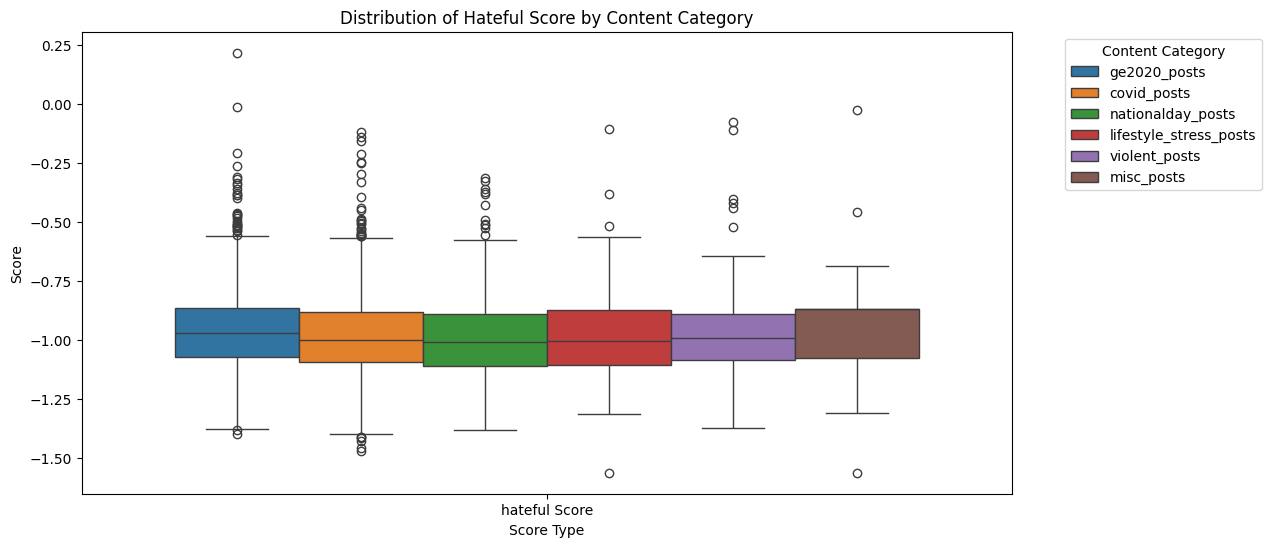

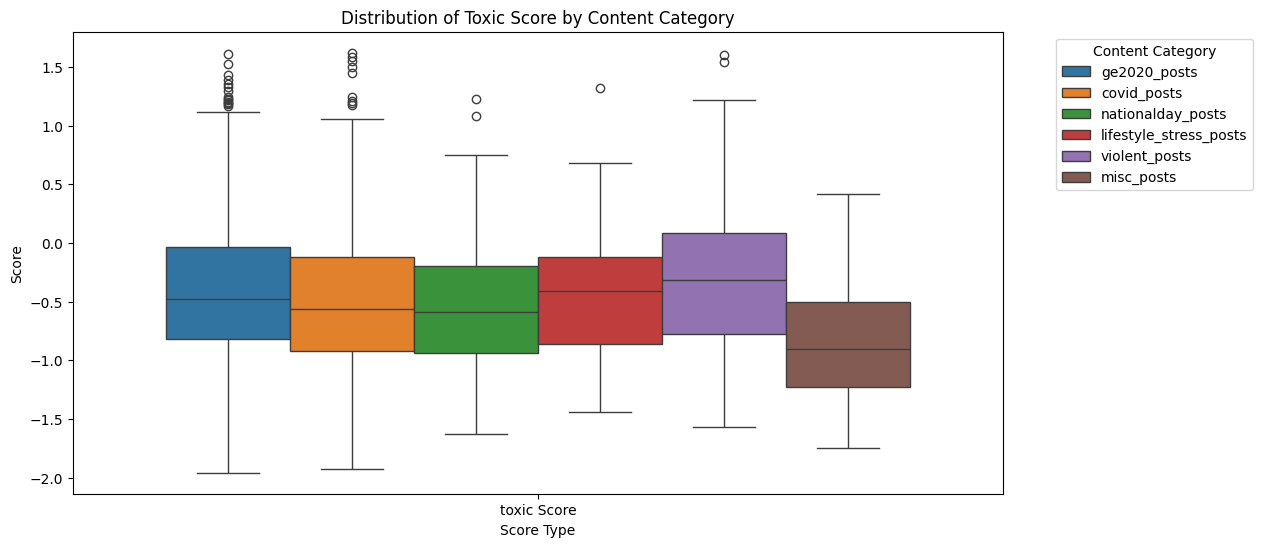

In [51]:
# Combine the individual DataFrames into one for plotting
dfs = {
    'ge2020_posts': ge2020_posts,
    'covid_posts': covid_posts,
    'nationalday_posts': nationalday_posts,
    'lifestyle_stress_posts': lifestyle_stress_posts,
    'violent_posts': violent_posts,
    'misc_posts': misc_posts
}

# Add a 'Content Category' column to each DataFrame and concatenate them
for category, df in dfs.items():
    df['Content Category'] = category

# Concatenate all DataFrames
combined_df = pd.concat(dfs.values(), ignore_index=True)

# Melt the DataFrame to bring it into a long format for Seaborn
long_df = combined_df.melt(id_vars=['Content Category'], 
                           value_vars=['hateful Score', 'toxic Score'],
                           var_name='Score Type', 
                           value_name='Score')

# Filter for hateful Score and toxic Score
hateful_df = long_df[long_df['Score Type'] == 'hateful Score']
toxic_df = long_df[long_df['Score Type'] == 'toxic Score']

# Plot the box plot for hateful Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=hateful_df, x='Score Type', y='Score', hue='Content Category')
plt.title('Distribution of Hateful Score by Content Category')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.legend(title='Content Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the box plot for toxic Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=toxic_df, x='Score Type', y='Score', hue='Content Category')
plt.title('Distribution of Toxic Score by Content Category')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.legend(title='Content Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conclusion

In summary, analysing the toxicity and hatefulness of the top 20 posts that had the most nummber of comments (excluding discussion posts and level_system_trial_2) across all 3 subreddits. The top 20 posts were grouped into 6 content categories based on the content of the post (eg. ge2020_posts, covid_posts, nationalday_posts, lifestyle _stress_posts, violent_posts, misc_post).

Found that generally toxic scores of comments for these top 20 posts are larger in magnitude than the hateful scores, meaning these posts garnered more toxicity than hatefulness. Max hateful score for these 6 content categories was around 0.25, while max toxic score was around 1.5. 

2 content categories, ge2020_posts and covid_posts were observed to have the highest toxic scores, with their outliers reaching above 1.5. These 2 categories also had the largest range of between 1.5 and -2. ge2020_posts was made up of 1,154 comments. covid_posts was made up of 1,040 comments. In terms of number of total comments these are the 2 largest content categories.

ge2020_posts, covid_posts and violent_posts have 75th percentile reaching over 1 on the toxic scores. The other categories have 75th percentile between 0.25 to 0.75.

Misc_posts had the least toxic scores, it is to noted that there was only 1 post that fell under this category it was titled 'singapore,on2hbu,using_only_emojis_which_town_are_you_from'. 


In terms of hateful scores ge2020_posts have the highest hateful scores of outliers reaching up to 0.25. None of the content categories did not have 75th percentiles reaching over 0 on the hateful scores. 

### Count of number of comments per top 20 posts 

```
ge2020_posts
singapore,homxdq,singapore_general_elections_2020_polling_results     918
singapore,hie65n,ge2020_nomination_day_mega_thread                    121
singapore,hj8h5p,ge_2020_political_debate_megathread                  115
---------------------------------------------------------------------------
                                                                     1,154

covid_posts
singapore,nc0vwe,no_dining_in_social_gatherings_capped_at_2_people    161
singapore,onx8xr,no_dining_in_social_group_sizes_cut_to_2_from        122
singapore,nosjic,megathread_pm_lee_delivers_national_address_on       106
singapore,q4cv50,pm_lee_to_address_nation_on_covid19_situation_and    100
singapore,qbyerz,stabilisation_phase_extended_to_nov_21_more_time      98
singapore,puh01k,covid19_diningin_group_size_limit_at_regular_fb       97
singapore,fu4ch0,pm_lee_announces_new_stricter_restrictions_to         91
singapore,q4e96u,those_unvaccinated_against_covid19_will_no_longer     89
singapore,tlvwx9,live_pm_lee_addresses_nation_on_covid19_situation     88
singapore,o104h0,covid19_task_force_evaluating_timing_and_scope_of     88
---------------------------------------------------------------------------
                                                                     1,040

nationalday_posts
singapore,wjxxdd,megathread_national_day_parade_2022                  111
singapore,wtc8jy,megathread_national_day_rally_2022                    99
---------------------------------------------------------------------------
                                                                       210

lifestyle_stress_posts
singapore,hs2ynr,this_is_basically_the_entirety_of_an_average         108
singapore,q3204h,whats_the_point_of_bringing_a_life_into_singapore     97
---------------------------------------------------------------------------
                                                                       205

violent_posts
singapore,on8f8m,river_valley_high_school_student_killed_on_campus    103
singapore,nj3o0j,someone_is_attacked_on_mrt                           102
---------------------------------------------------------------------------
                                                                       205
                                                                
misc_posts
singapore,on2hbu,using_only_emojis_which_town_are_you_from             95
```

# Wordclouds

## Wordcloud of most frequent word for each category

In [52]:
# Ensure stopwords are downloaded (if not already done)
nltk.download('stopwords')
common_stopwords = set(stopwords.words('english'))


# Example data structure for multiple posts, adjust accordingly
posts_data = [
    (ge2020_posts, 'GE2020 Posts'),
    (covid_posts, 'COVID Posts'),
    (nationalday_posts, 'National Day Posts'),
    (lifestyle_stress_posts, 'Lifestyle Stress Posts'),
    (violent_posts, 'Violent Posts'),
    (misc_posts, 'Miscellaneous Posts')
]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Number of subplots based on the length of posts_data
n_posts = len(posts_data)
n_cols = 2
n_rows = math.ceil(n_posts / n_cols)

# Function to preprocess text by removing common stopwords
def preprocess_text(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in common_stopwords]
    return ' '.join(filtered_words)

# Preprocess each DataFrame
for i, (df, _) in enumerate(posts_data):
    df['text'] = df['text'].fillna('').apply(preprocess_text)  # Remove NaN values and apply stop word removal


/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/1814637069.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('').apply(preprocess_text)  # Remove NaN values and apply stop word removal


/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/3779220352.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')


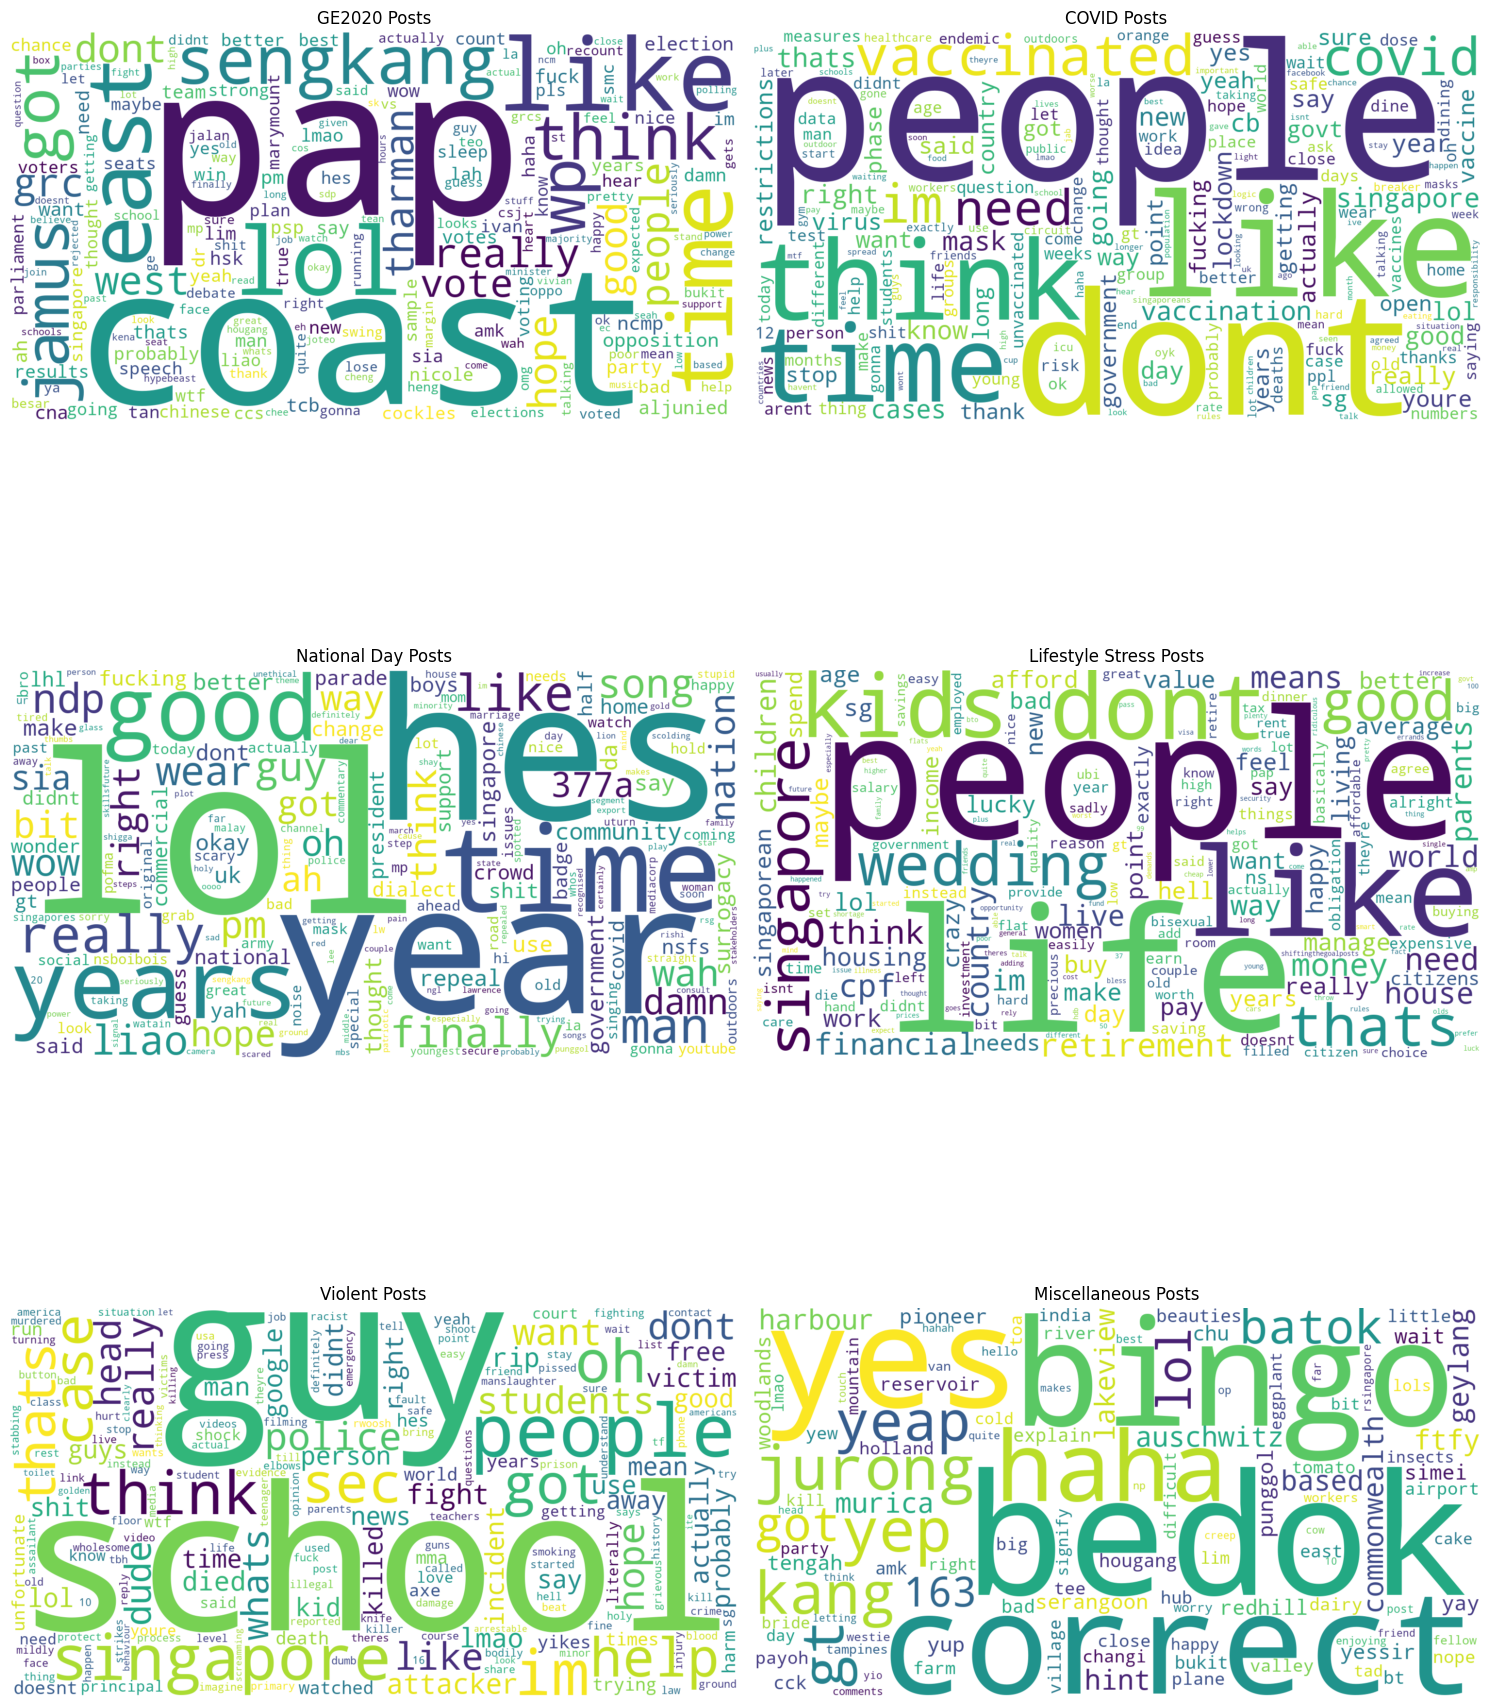

In [54]:



# Number of subplots based on the length of posts_data
n_posts = len(posts_data)
n_cols = 2
n_rows = math.ceil(n_posts / n_cols)

plt.figure(figsize=(15, 7 * n_rows))

# Loop through the DataFrames to generate word clouds
for i, (df, title) in enumerate(posts_data):
    # Create TF-IDF Vectorizer (without preprocessor)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_features=500)

    # Fill NaN values and fit-transform the data
    df['text'] = df['text'].fillna('')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'].values)

    # Sum the TF-IDF scores for each term across all documents
    tfidf_sum = tfidf_matrix.sum(axis=0)

    # Get words and corresponding TF-IDF scores
    words = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_sum.A1  # Convert to a 1D array
    word_scores = dict(zip(words, tfidf_scores))

    # Generate the word cloud
    wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

    # Plot the word cloud
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()



## Wordcloud for most frequently used words in comments that are toxic (toxic score > 0)

/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/1084263773.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxic_comments['text'] = toxic_comments['text'].fillna('')


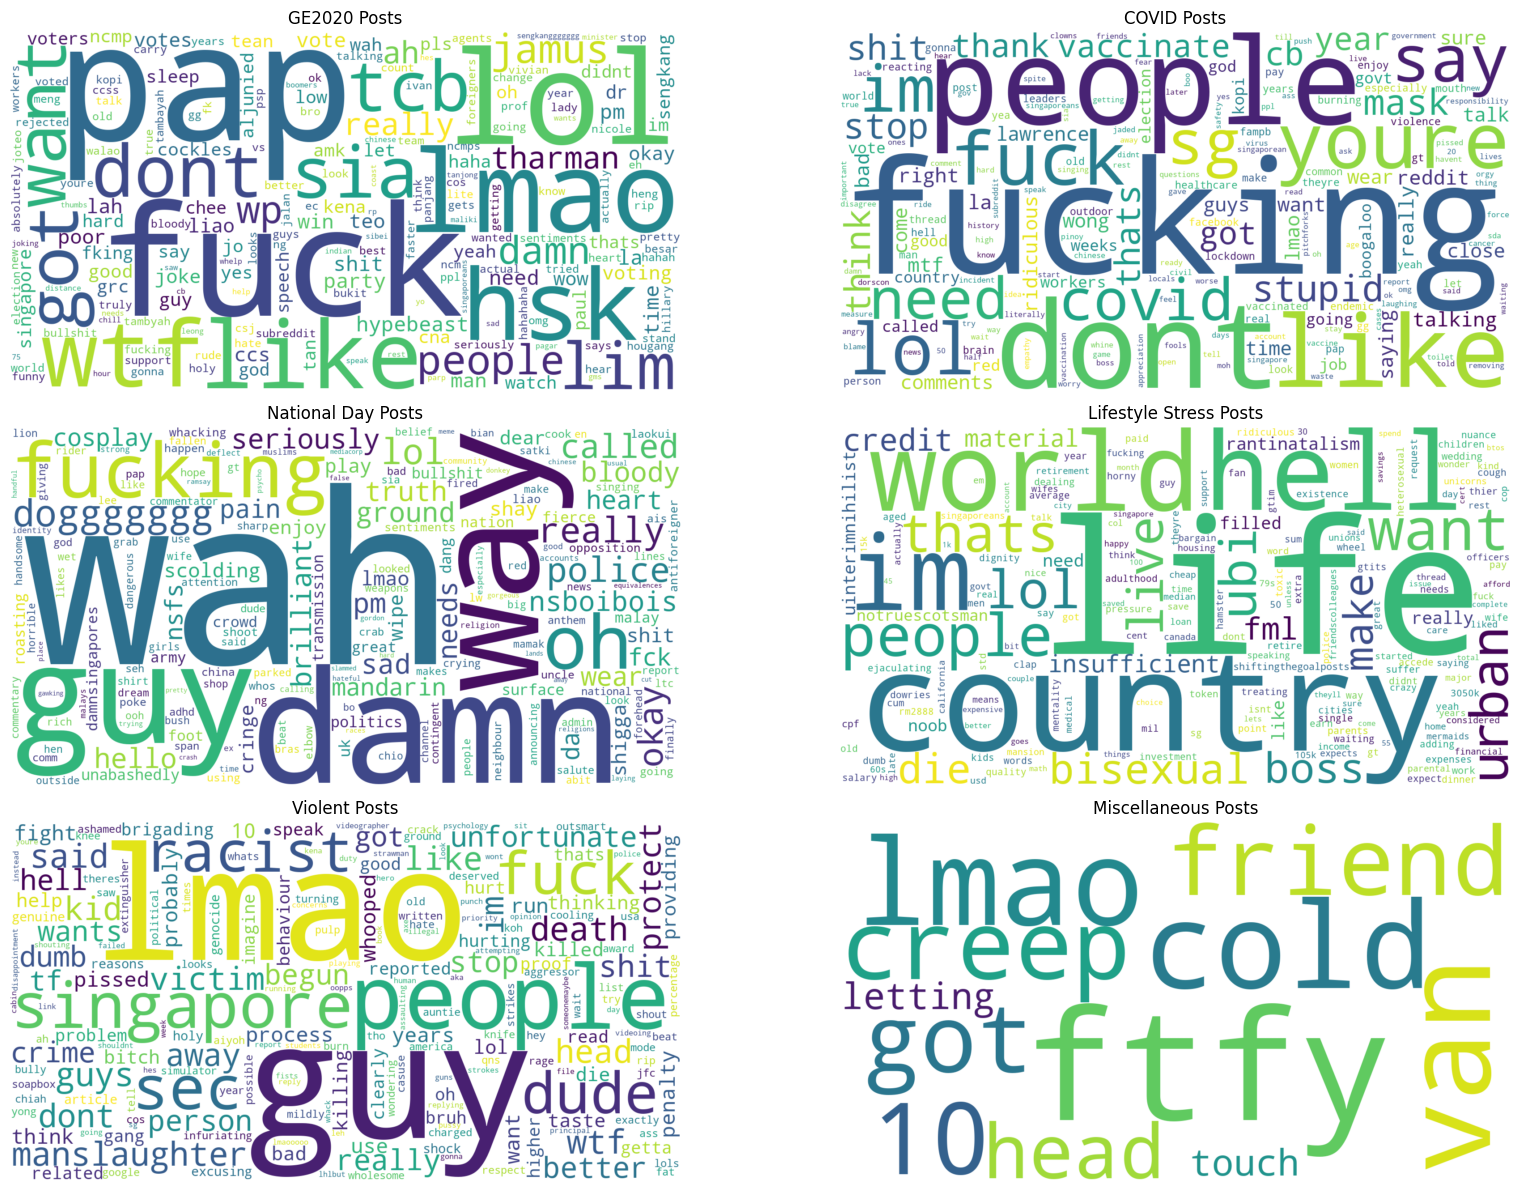

In [ ]:
# Create a figure to hold the subplots
plt.figure(figsize=(18, 12))

# Loop through the DataFrames to generate word clouds
for i, (df, title) in enumerate(posts_data):
    # Filter for toxic comments with a score greater than 0
    toxic_comments = df[df['toxic Score'] > 0]
    
    if toxic_comments.empty:  # Skip if there are no toxic comments
        continue

    # Create TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_features=500)

    # Fill NaN values and fit-transform the data
    toxic_comments['text'] = toxic_comments['text'].fillna('')
    tfidf_matrix = tfidf_vectorizer.fit_transform(toxic_comments['text'].values)

    # Sum the TF-IDF scores for each term across all documents
    tfidf_sum = tfidf_matrix.sum(axis=0)

    # Get words and corresponding TF-IDF scores
    words = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_sum.A1  # Convert to a 1D array
    word_scores = dict(zip(words, tfidf_scores))

    # Generate the word cloud
    wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

    # Plot the word cloud
    plt.subplot(3, 2, i + 1)  # Arrange plots in 3 rows and 2 columns
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Wordcloud for most frequently used words in comments that are hateful (hateful score > 0)

Note: only ge2020_posts have comments that have a hateful score >0.

/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/459730818.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hateful_comments['text'] = hateful_comments['text'].fillna('')


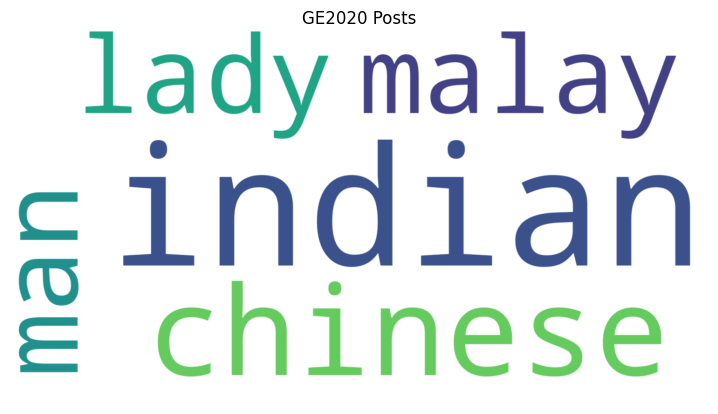

In [ ]:

# Assuming you have separate DataFrames for each content category
posts_data = [
    (ge2020_posts, 'GE2020 Posts'),
    (covid_posts, 'COVID Posts'),
    (nationalday_posts, 'National Day Posts'),
    (lifestyle_stress_posts, 'Lifestyle Stress Posts'),
    (violent_posts, 'Violent Posts'),
    (misc_posts, 'Miscellaneous Posts')
]

# Create a figure to hold the subplots
plt.figure(figsize=(18, 12))

# Loop through the DataFrames to generate word clouds
for i, (df, title) in enumerate(posts_data):
    # Filter for hateful comments with a score greater than 0
    hateful_comments = df[df['hateful Score'] > 0]
    
    if hateful_comments.empty:  # Skip if there are no hateful comments
        continue

    # Create TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_features=500)

    # Fill NaN values and fit-transform the data
    hateful_comments['text'] = hateful_comments['text'].fillna('')
    tfidf_matrix = tfidf_vectorizer.fit_transform(hateful_comments['text'].values)

    # Sum the TF-IDF scores for each term across all documents
    tfidf_sum = tfidf_matrix.sum(axis=0)

    # Get words and corresponding TF-IDF scores
    words = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_sum.A1  # Convert to a 1D array
    word_scores = dict(zip(words, tfidf_scores))

    # Generate the word cloud
    wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

    # Plot the word cloud
    plt.subplot(3, 2, i + 1)  # Arrange plots in 3 rows and 2 columns
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()


## Wordcloud for most frequently used words in comments that are toxic (toxic score > 0) overall

/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/456377290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxic_comments['text'] = toxic_comments['text'].fillna('')


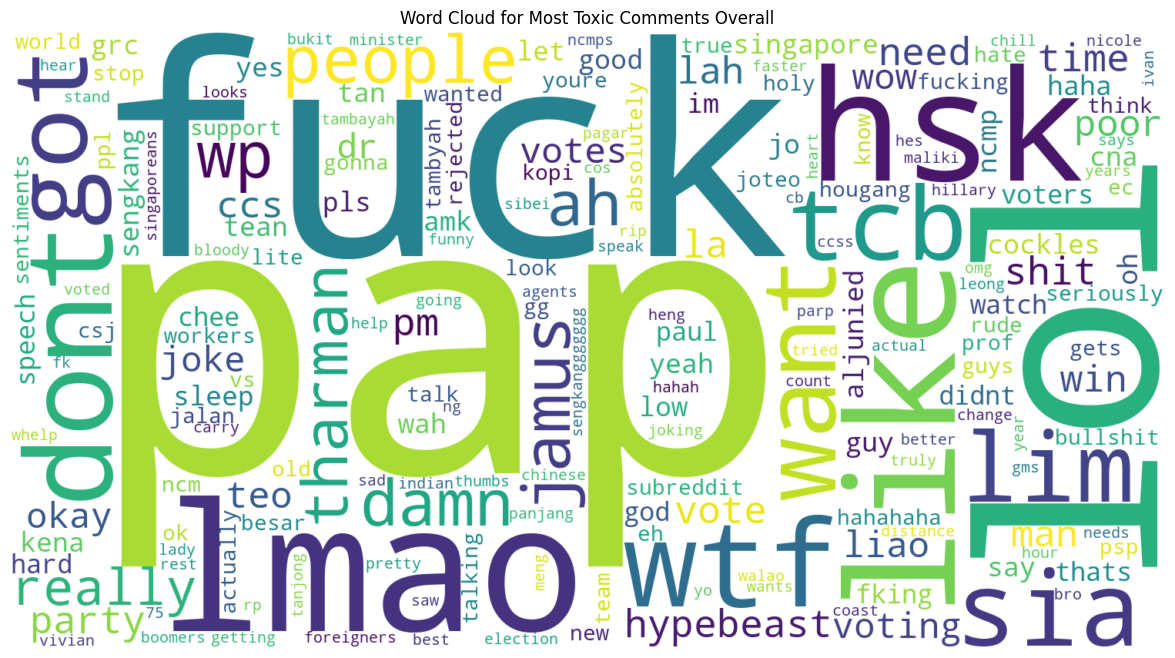

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `ge2020_posts` is your DataFrame containing the toxic comments
# Filter the DataFrame to get comments with a toxic score greater than 0
toxic_comments = ge2020_posts[ge2020_posts['toxic Score'] > 0]

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_features=500)

# Fill NaN values and fit-transform the data
toxic_comments['text'] = toxic_comments['text'].fillna('')
tfidf_matrix = tfidf_vectorizer.fit_transform(toxic_comments['text'].values)

# Sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_matrix.sum(axis=0)

# Get words and corresponding TF-IDF scores
words = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_sum.A1  # Convert to a 1D array
word_scores = dict(zip(words, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Most Toxic Comments Overall')
plt.show()


## Wordcloud for most frequently used words in comments that are hateful (hateful score > 0) overall

/var/folders/cc/b861mgp53v7bmzgrnyrglk0w0000gn/T/ipykernel_78548/1139470148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hateful_comments['text'] = hateful_comments['text'].fillna('')


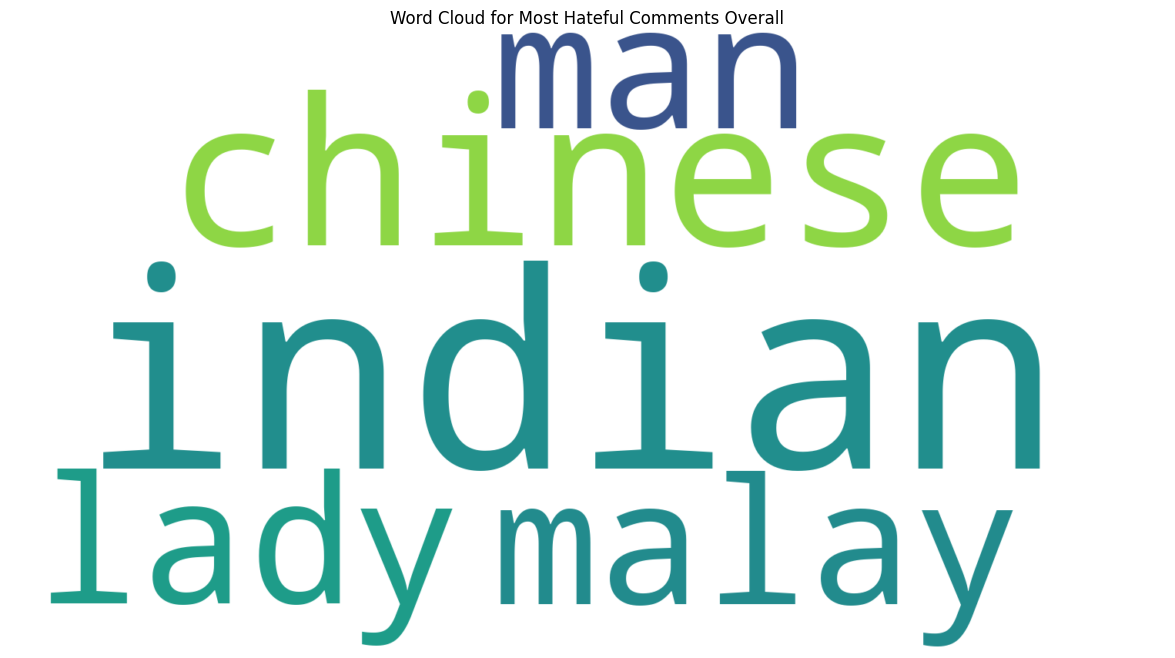

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `ge2020_posts` is your DataFrame containing the hateful comments
# Filter the DataFrame to get comments with a hateful score greater than 0
hateful_comments = ge2020_posts[ge2020_posts['hateful Score'] > 0]

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_features=500)

# Fill NaN values and fit-transform the data
hateful_comments['text'] = hateful_comments['text'].fillna('')
tfidf_matrix = tfidf_vectorizer.fit_transform(hateful_comments['text'].values)

# Sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_matrix.sum(axis=0)

# Get words and corresponding TF-IDF scores
words = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_sum.A1  # Convert to a 1D array
word_scores = dict(zip(words, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Most Hateful Comments Overall')
plt.show()


# Limitations

A limitation of this analysis is that due to our limited processing ability we had to sample the dataset. Therefore there is a possibility that the true top posts with the most number of comments was not as accurately captured. 